In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt
import scipy.stats as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data=pd.read_csv('Testing in Karnataka.csv')

In [3]:
data.head()

,Date,Samples,Samples Cumulative,Negative,Negative Cumulative,Positive,Positive Cumulative
0,2020-03-13,60,639,80,540,0,6
1,2020-03-14,92,731,50,590,0,6
2,2020-03-15,131,862,19,609,0,6
3,2020-03-16,33,895,86,695,1,7
4,2020-03-17,48,943,71,766,4,11


In [4]:
import datetime as dt
data['Date_num'] = pd.to_datetime(data['Date'])


In [5]:
data['Date_num']=data['Date_num'].map(dt.datetime.toordinal)

In [6]:
data.head()

,Date,Samples,Samples Cumulative,Negative,Negative Cumulative,Positive,Positive Cumulative,Date_num
0,2020-03-13,60,639,80,540,0,6,737497
1,2020-03-14,92,731,50,590,0,6,737498
2,2020-03-15,131,862,19,609,0,6,737499
3,2020-03-16,33,895,86,695,1,7,737500
4,2020-03-17,48,943,71,766,4,11,737501


In [7]:
X = data['Date_num'].values.reshape(-1,1)

In [8]:
Y=data['Positive Cumulative'].values.reshape(-1,1)

In [9]:
data

,Date,Samples,Samples Cumulative,Negative,Negative Cumulative,Positive,Positive Cumulative,Date_num
0,2020-03-13,60,639,80,540,0,6,737497
1,2020-03-14,92,731,50,590,0,6,737498
2,2020-03-15,131,862,19,609,0,6,737499
3,2020-03-16,33,895,86,695,1,7,737500
4,2020-03-17,48,943,71,766,4,11,737501
5,2020-03-18,125,1068,103,869,3,14,737502
6,2020-03-19,75,1143,46,915,1,15,737503
7,2020-03-20,64,1207,55,970,0,15,737504
8,2020-03-21,170,1377,26,996,5,20,737505
9,2020-03-22,10,1387,112,1108,6,26,737506


In [10]:
regressor = LinearRegression()

In [11]:
regressor.fit(X,Y)

LinearRegression()

In [12]:
y_pred=regressor.predict(X)

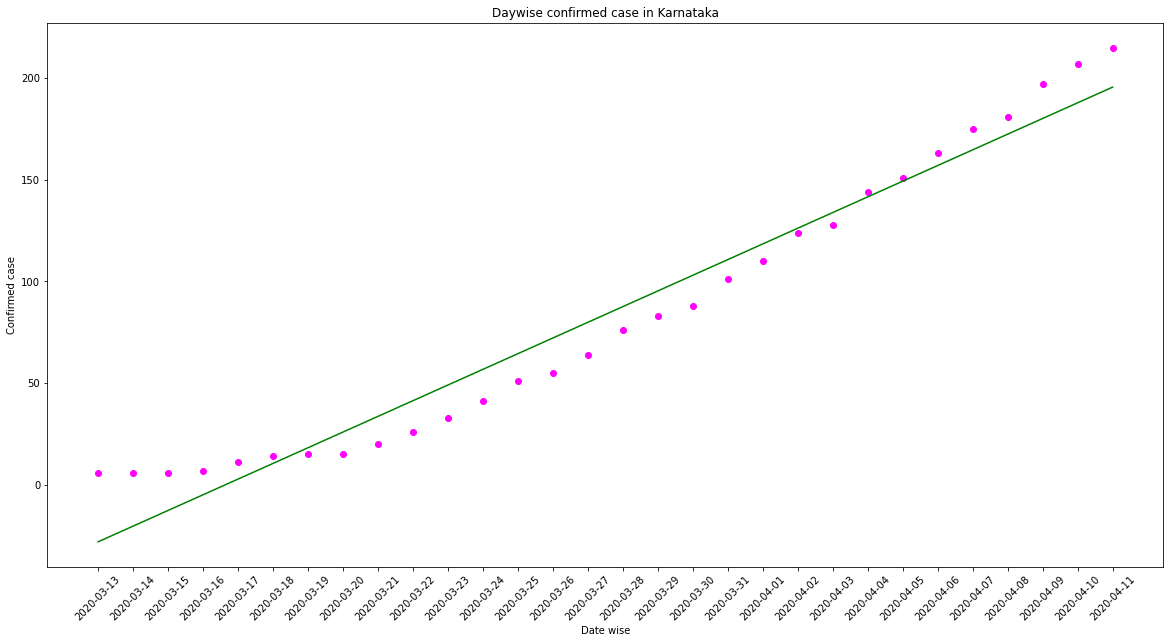

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(data.Date, Y, color = 'magenta')
plt.plot(data.Date, y_pred, color = 'green')
plt.xticks(rotation=45)
plt.title('Daywise confirmed case in Karnataka')
plt.xlabel('Date wise')
plt.ylabel('Confirmed case')
plt.show()


In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly=PolynomialFeatures(degree = 2)

In [16]:
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,Y)
y_poly_pred=regressor.predict(X_poly)


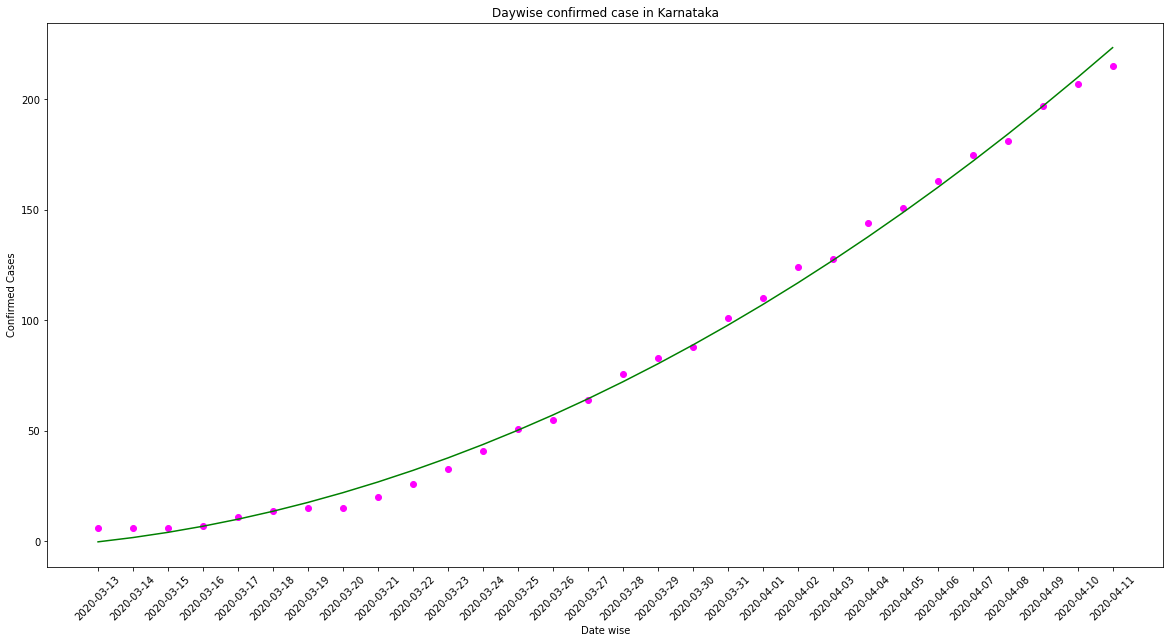

In [17]:
plt.figure(figsize=(20,10))
plt.scatter(data.Date, Y, color = 'magenta')
plt.plot(data.Date, y_poly_pred, color = 'green')
plt.xticks(rotation=45)
plt.title('Daywise confirmed case in Karnataka')
plt.xlabel('Date wise')
plt.ylabel('Confirmed Cases')
plt.show()


In [18]:
rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print('RMSE is ' + str(rmse))
print('r2 is ' +str(r2))

RMSE is 4.008063312678014
r2 is 0.9965534403543239


In [19]:
regressor.predict(poly.fit_transform([[6.5]]))

array([[1.12053124e+11]])

In [20]:
regressor.coef_

array([[ 0.00000000e+00, -3.03881207e+05,  2.06023173e-01]])